In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
IIT_churn_master_dataset = pd.read_excel('Data/IIT_churn_final_dataset.xlsx')
sales_account = pd.read_excel('Data/sales_account.xlsx')

In [ ]:
IIT_churn_master_dataset.columns

## Coverage_Priority__c

In [ ]:
#NewlyAdded
#Filtered out values from coverage priority
list_filter = ['Government','Government Contractor','Uncovered']
IIT_churn_master_dataset=IIT_churn_master_dataset[~IIT_churn_master_dataset.Coverage_Priority__c.isin(list_filter)]


In [ ]:
df_group = IIT_churn_master_dataset.groupby(['Coverage_Priority__c','churn_standard'])['Customer No'].count().reset_index()
df_group_pivot = df_group.pivot_table('Customer No', ['Coverage_Priority__c'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (5, 5))
plt.title("Coverage Priority vs Churn")
plt.xlabel("Coverage Priority")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()

fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Coverage_Priority__c'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)
plt.title("Odds Ratio of Coverage Priority")
plt.xlabel("Coverage Priority")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")


plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable Score : 7

# Client_revenue

In [ ]:
# Replacing Missing values
IIT_churn_master_dataset['Client_revenue'] = sales_account['Client_revenue']
IIT_churn_master_dataset['Client_revenue'].fillna('other', inplace = True)

In [ ]:
IIT_churn_master_dataset['Client_revenue'].unique()

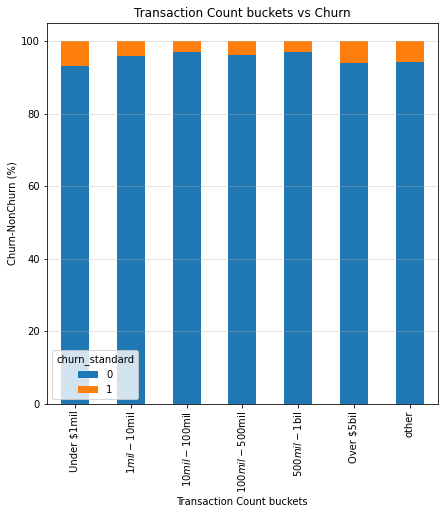

In [73]:
df_group = IIT_churn_master_dataset.groupby(['Client_revenue','churn_standard'])['Customer No'].count().reset_index()

df_group['Client_revenue'] = df_group['Client_revenue'].astype('category')

df_group['Client_revenue'] = df_group['Client_revenue'].cat.reorder_categories(['Under $1mil','$1mil-$10mil','$10mil-$100mil','$100mil-$500mil','$500mil-$1bil','Over $5bil','other'])

df_group_pivot = df_group.pivot_table('Customer No', ['Client_revenue'], 'churn_standard')

stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("Transaction Count buckets vs Churn")
plt.xlabel("Transaction Count buckets")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

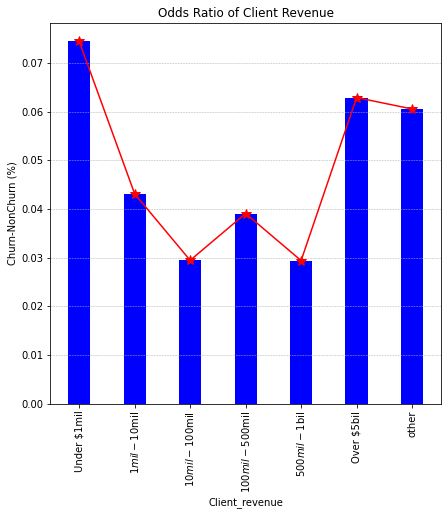

In [74]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()

fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Client_revenue'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)
plt.title("Odds Ratio of Client Revenue")
plt.xlabel("Client_revenue")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")


plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable Score 5

# Family_Industry_Description_New__c

In [ ]:
IIT_churn_master_dataset['Family_Industry_Description_New__c'].fillna('Unassigned', inplace = True)
IIT_churn_master_dataset['Family_Industry_Description_New__c'].value_counts()

In [ ]:
df_group = IIT_churn_master_dataset.groupby(['Family_Industry_Description_New__c','churn_standard'])['Customer No'].count().reset_index()
df_group_pivot = df_group.pivot_table('Customer No', ['Family_Industry_Description_New__c'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("Industry Type vs Churn")
plt.xlabel("Industry Type")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()

fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Family_Industry_Description_New__c'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)
plt.title("Odds Ratio of Industry Type")
plt.xlabel("Industry Type")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable score 5

# compliance_score

In [ ]:
IIT_churn_master_dataset['compliance_score'].fillna(3, inplace = True)
IIT_churn_master_dataset["compliance_score"].replace({1: "High", 2: "Medium", 3:"Low"}, inplace=True)

In [ ]:
df_group = IIT_churn_master_dataset.groupby(['compliance_score','churn_standard'])['Customer No'].count().reset_index()

df_group['compliance_score'] = df_group['compliance_score'].astype('category')

df_group['compliance_score'] = df_group['compliance_score'].cat.reorder_categories(['High','Medium','Low'])


df_group_pivot = df_group.pivot_table('Customer No', ['compliance_score'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("compliance_score vs Churn")
plt.xlabel("compliance_score")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7,7))
plt.bar(df_group_pivot['compliance_score'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of compliance_score")
plt.xlabel("compliance_score")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable Score 7

## Territory__c

In [ ]:
IIT_churn_master_dataset['Territory__c'].fillna('UNKNOWN', inplace = True)
df_group = IIT_churn_master_dataset.groupby(['Territory__c','churn_standard'])['Customer No'].count().reset_index()

df_group_pivot = df_group.pivot_table('Customer No', ['Territory__c'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("Territory vs Churn")
plt.xlabel("Territory")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Territory__c'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of Territory")
plt.xlabel("Territory")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable Score 6

## Platinum_Quality_bucket

In [ ]:
df_group = IIT_churn_master_dataset.groupby(['Platinum_Quality_bucket','churn_standard'])['Customer No'].count().reset_index()

df_group_pivot = df_group.pivot_table('Customer No', ['Platinum_Quality_bucket'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("Platinum_Quality_bucket vs Churn")
plt.xlabel("Platinum_Quality_bucket")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

In [ ]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Platinum_Quality_bucket'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of Platinum_Quality_bucket")
plt.xlabel("Platinum_Quality_bucket")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)

Variable Score 7

# Continuous variables

## Platinum_Quality_Ratio

In [ ]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['churn_standard','Platinum_Quality_Ratio']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[IIT_churn_master_dataset_sub['churn_standard'] == 1, "Platinum_Quality_Ratio"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[IIT_churn_master_dataset_sub['churn_standard'] == 0, "Platinum_Quality_Ratio"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus Platinum_Quality_Ratio', fontsize=22)
plt.ylabel('density')
plt.xlabel('Platinum_Quality_Ratio')
plt.legend()
plt.show()

Variable score 6

## Platinum_Gold_Quality_Ratio

In [ ]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['churn_standard','Platinum_Quality_Ratio']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[IIT_churn_master_dataset_sub['churn_standard'] == 1, "Platinum_Quality_Ratio"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[IIT_churn_master_dataset_sub['churn_standard'] == 0, "Platinum_Quality_Ratio"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus Platinum_Quality_Ratio', fontsize=22)
plt.ylabel('density')
plt.xlabel('Platinum_Quality_Ratio')
plt.legend()
plt.show()

Score 6.5

## total_platinum_gold_items_per_transaction

In [ ]:
IIT_churn_master_dataset['plat_gold_per_transaction'] = (IIT_churn_master_dataset['total_platinum_items'] + IIT_churn_master_dataset['total_gold_items'])/IIT_churn_master_dataset['count']
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['plat_gold_per_transaction','churn_standard']]

plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1) & (IIT_churn_master_dataset_sub['plat_gold_per_transaction'] < 20) , "plat_gold_per_transaction"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0) & (IIT_churn_master_dataset_sub['plat_gold_per_transaction'] < 20), "plat_gold_per_transaction"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus plat_gold_per_transaction', fontsize=22)
plt.ylabel('density')
plt.xlabel('plat_gold_per_transaction')
plt.legend()
plt.show()

Score 6.5

## Gradient_Amount

### Here the Revenue means the cost or the amount of sales done

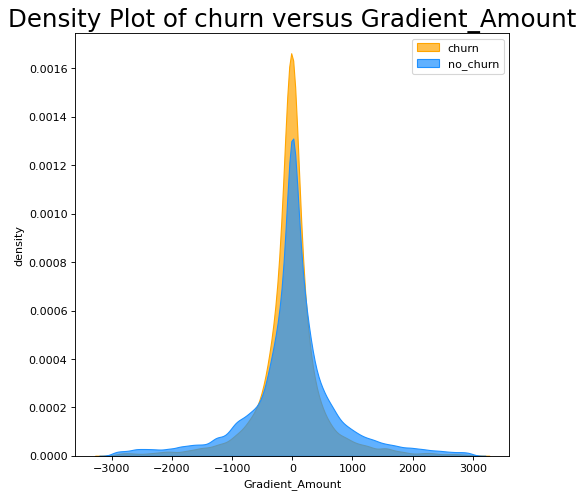

In [76]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['Gradient_Revenue','churn_standard']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1) & (IIT_churn_master_dataset_sub['Gradient_Revenue'] < 3000) & (IIT_churn_master_dataset_sub['Gradient_Revenue'] > -3000), "Gradient_Revenue"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0)& (IIT_churn_master_dataset_sub['Gradient_Revenue'] < 3000) & (IIT_churn_master_dataset_sub['Gradient_Revenue'] > -3000) , "Gradient_Revenue"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus Gradient_Amount', fontsize=22) #revenue->Amount
plt.ylabel('density')
plt.xlabel('Gradient_Amount')
plt.legend()
plt.show()

Score: 5

Making buckets of gradient rev

In [39]:
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Gradient_Revenue'] <= 0),'gradient_rev_direction'] = 'negative'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Gradient_Revenue'] > 0) & (IIT_churn_master_dataset['Gradient_Revenue'] < 500),'gradient_rev_direction'] = 'positive'
#IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Gradient_Revenue'] >= 500),'gradient_rev_direction'] = 'very_positive'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Gradient_Revenue'] >= 500),'gradient_rev_direction'] = 'highly_positive'


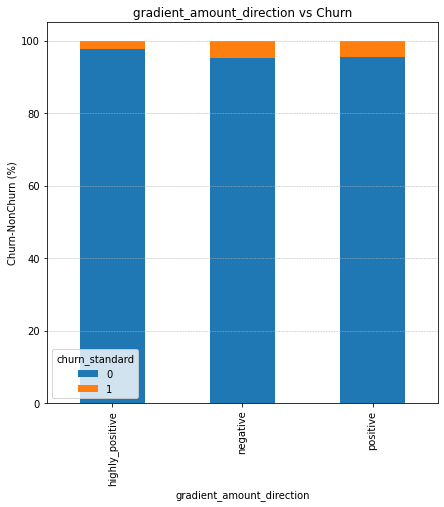

In [77]:
df_group = IIT_churn_master_dataset.groupby(['gradient_rev_direction','churn_standard'])['Customer No'].count().reset_index()

df_group_pivot = df_group.pivot_table('Customer No', ['gradient_rev_direction'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("gradient_amount_direction vs Churn")
plt.xlabel("gradient_amount_direction")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

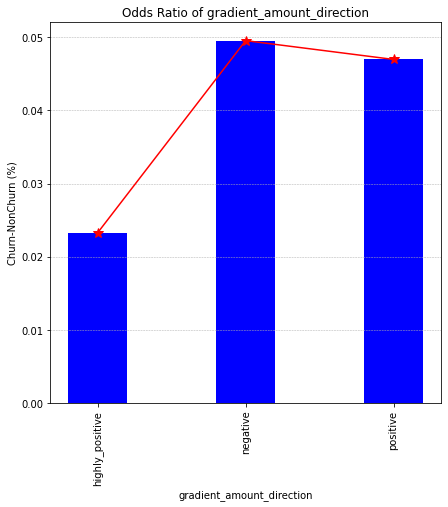

In [78]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['gradient_rev_direction'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of gradient_amount_direction")
plt.xlabel("gradient_amount_direction")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)


Score: 8

## item_diversity_index

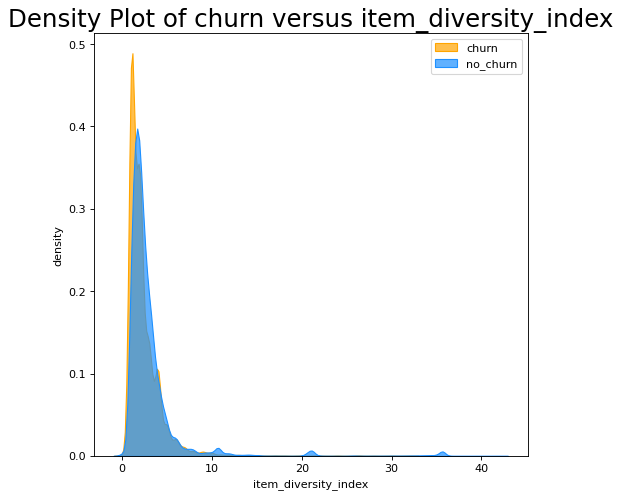

In [42]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['item_diversity_index','churn_standard']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1), "item_diversity_index"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0), "item_diversity_index"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus item_diversity_index', fontsize=22)
plt.ylabel('density')
plt.xlabel('item_diversity_index')
plt.legend()
plt.show()

score: 6

Making buckets of item diversity index

In [44]:
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['item_diversity_index'] > 0) & (IIT_churn_master_dataset['item_diversity_index'] <= 2),'item_diversity_buckets'] = '1-2'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['item_diversity_index'] > 2) & (IIT_churn_master_dataset['item_diversity_index'] <= 4),'item_diversity_buckets'] = '2-4'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['item_diversity_index'] > 4) & (IIT_churn_master_dataset['item_diversity_index'] <= 6),'item_diversity_buckets'] = '4-6'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['item_diversity_index'] > 6) & (IIT_churn_master_dataset['item_diversity_index'] <= 8),'item_diversity_buckets'] = '6-8'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['item_diversity_index'] > 8),'item_diversity_buckets'] = '>8'

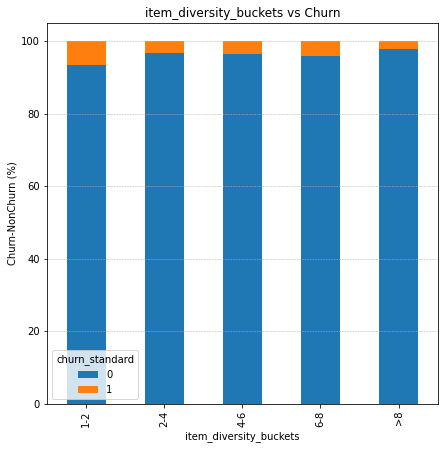

In [45]:
df_group = IIT_churn_master_dataset.groupby(['item_diversity_buckets','churn_standard'])['Customer No'].count().reset_index()

df_group_pivot = df_group.pivot_table('Customer No', ['item_diversity_buckets'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("item_diversity_buckets vs Churn")
plt.xlabel("item_diversity_buckets")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

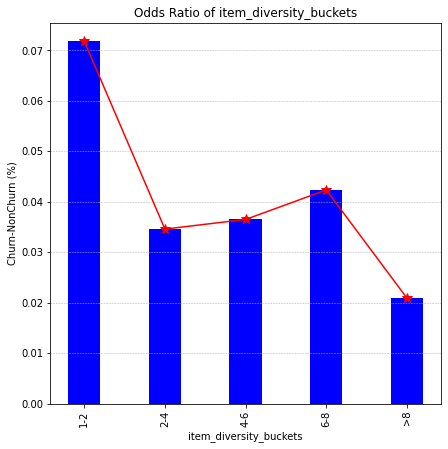

In [46]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['item_diversity_buckets'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of item_diversity_buckets")
plt.xlabel("item_diversity_buckets")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)


Score: 3

In [47]:
IIT_churn_master_dataset.columns

Index(['Unnamed: 0', 'customer_time', 'Customer No', 'Posting Date',
       'time_to_order', 'count', 'expected_purchase_window',
       'time_to_churn_standard', 'churn_standard', 'time_to_churn_modified',
       'churn_modified', 'churn_score', 'churn alarm', 'Coverage_Priority__c',
       'HQ_State__c', 'ZI_Company_Revenue_Range__c', 'ZI_Company_Ranking__c',
       'ZI_Company_Employee_Range__c', 'Tier__c', 'ZI_Company_Type__c',
       'ZI_Number_Of_Locations__c', 'ZI_Technologies__c',
       'cumulative_sum_revenue', 'revenue_bucket', 'Client_revenue',
       'total_platinum_items', 'total_gold_items', 'total_silver_items',
       'total_Bronze_items', 'total_Metal_items', 'Platinum_Quality_Ratio',
       'Platinum_Gold_Quality_Ratio', 'Platinum_bucket',
       'Platinum_Quality_bucket', 'tenure', 'AvgCost', 'AvgQuantity',
       'TotalQuantity', 'TotalCost', 'Customer_specific_pop.Item',
       'Popular_item_count', 'No.Of Managers', 'Consolidated_Silverpop',
       'Total_DGOP_Co

## time_between_sales_trend

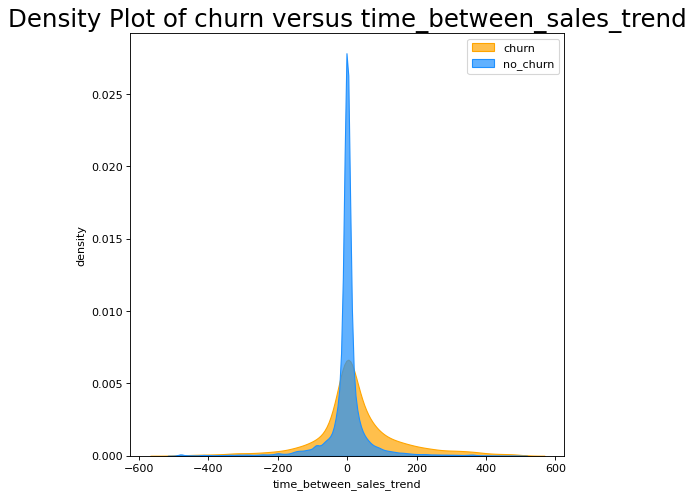

In [48]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['time_between_sales_trend','churn_standard']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1) & (IIT_churn_master_dataset_sub['time_between_sales_trend'] < 500) & (IIT_churn_master_dataset_sub['time_between_sales_trend'] > -500), "time_between_sales_trend"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0) & (IIT_churn_master_dataset_sub['time_between_sales_trend'] < 500) & (IIT_churn_master_dataset_sub['time_between_sales_trend'] > -500), "time_between_sales_trend"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus time_between_sales_trend', fontsize=22)
plt.ylabel('density')
plt.xlabel('time_between_sales_trend')
plt.legend()
plt.show()

Score: 7.5

Making buckets

In [49]:
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['time_between_sales_trend'] < -50) ,'time_between_sales_trend_buckets'] = '<-30'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['time_between_sales_trend'] > -50) & (IIT_churn_master_dataset['time_between_sales_trend'] <= 50),'time_between_sales_trend_buckets'] = '-30_to_30'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['time_between_sales_trend'] > 50) & (IIT_churn_master_dataset['time_between_sales_trend'] <= 100),'time_between_sales_trend_buckets'] = '30-100'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['time_between_sales_trend'] > 100),'time_between_sales_trend_buckets'] = '>100'


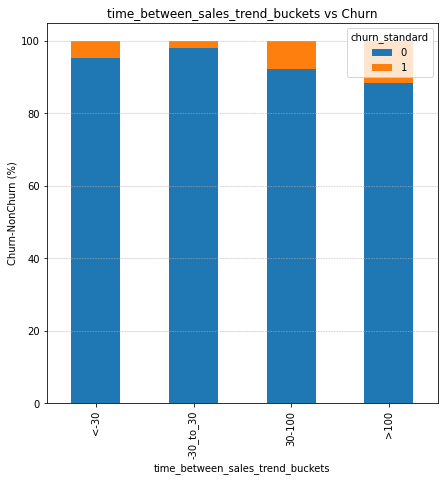

In [50]:
df_group = IIT_churn_master_dataset.groupby(['time_between_sales_trend_buckets','churn_standard'])['Customer No'].count().reset_index()


df_group['time_between_sales_trend_buckets'] = df_group['time_between_sales_trend_buckets'].astype('category')

df_group['time_between_sales_trend_buckets'] = df_group['time_between_sales_trend_buckets'].cat.reorder_categories(['<-30','-30_to_30','30-100','>100'])

df_group_pivot = df_group.pivot_table('Customer No', ['time_between_sales_trend_buckets'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("time_between_sales_trend_buckets vs Churn")
plt.xlabel("time_between_sales_trend_buckets")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

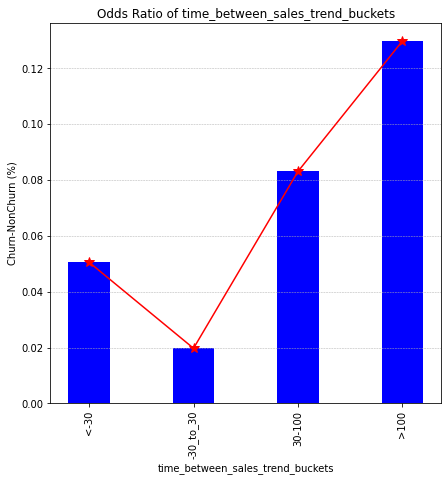

In [51]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['time_between_sales_trend_buckets'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of time_between_sales_trend_buckets")
plt.xlabel("time_between_sales_trend_buckets")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)


Score: 7

## Perc_DGOP

In [52]:
IIT_churn_master_dataset['Perc_DGOP'].fillna(33, inplace = True)

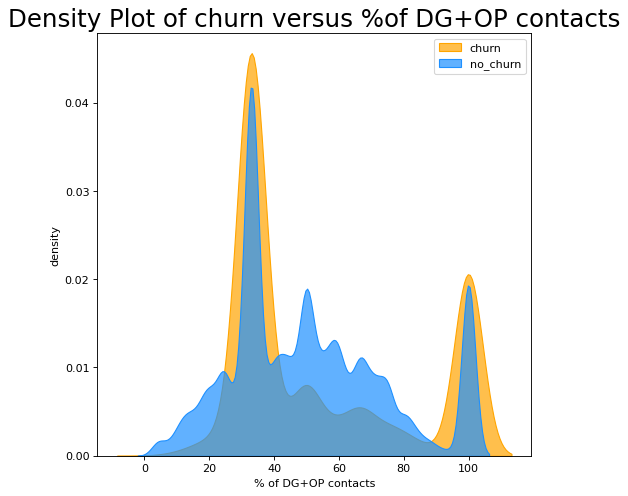

In [55]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['Perc_DGOP','churn_standard']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1), "Perc_DGOP"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0), "Perc_DGOP"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus %of DG+OP contacts', fontsize=22)
plt.ylabel('density')
plt.xlabel('% of DG+OP contacts')
plt.legend()
plt.show()

In [56]:
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Perc_DGOP'] < 34 ),'Perc_DGOP_buckets'] = '<34'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Perc_DGOP'] > 34) & (IIT_churn_master_dataset['Perc_DGOP'] <= 66),'Perc_DGOP_buckets'] = '34-66'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['Perc_DGOP'] > 66),'Perc_DGOP_buckets'] = '>66'


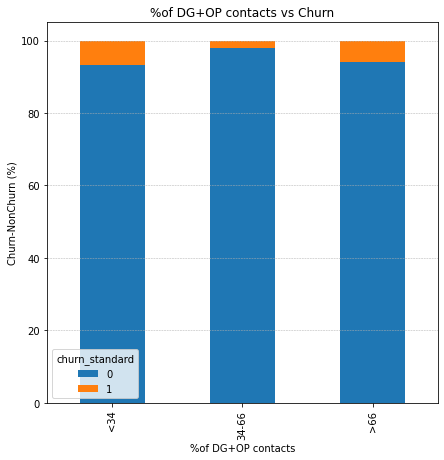

In [59]:
df_group = IIT_churn_master_dataset.groupby(['Perc_DGOP_buckets','churn_standard'])['Customer No'].count().reset_index()


df_group['Perc_DGOP_buckets'] = df_group['Perc_DGOP_buckets'].astype('category')

df_group['Perc_DGOP_buckets'] = df_group['Perc_DGOP_buckets'].cat.reorder_categories(['<34','34-66','>66'])

df_group_pivot = df_group.pivot_table('Customer No', ['Perc_DGOP_buckets'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("%of DG+OP contacts vs Churn")
plt.xlabel("%of DG+OP contacts")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

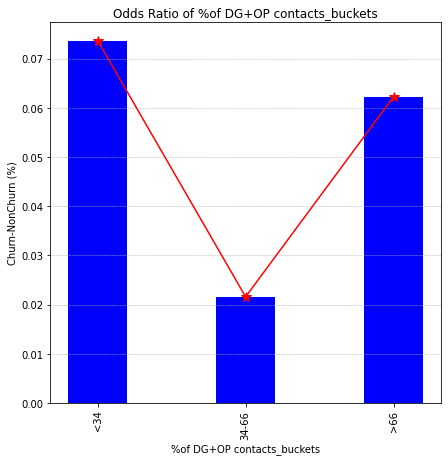

In [60]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['Perc_DGOP_buckets'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of %of DG+OP contacts_buckets")
plt.xlabel("%of DG+OP contacts_buckets")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)


Score: 5

## Dept Diversity Index

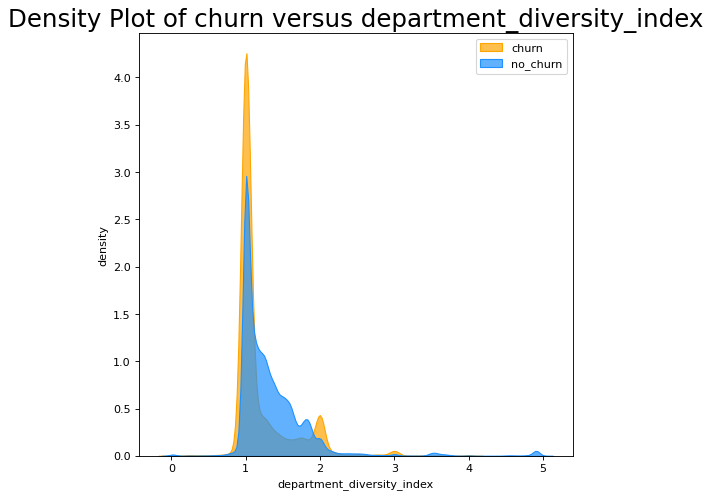

In [64]:
IIT_churn_master_dataset_sub = IIT_churn_master_dataset[['dept_diversity_index','churn_standard']]
plt.figure(figsize=(7,7), dpi= 80)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 1), "dept_diversity_index"], shade=True, color="orange", label="churn", alpha=.7)
sns.kdeplot(IIT_churn_master_dataset_sub.loc[(IIT_churn_master_dataset_sub['churn_standard'] == 0), "dept_diversity_index"], shade=True, color="dodgerblue", label="no_churn", alpha=.7)

# Decoration
plt.title('Density Plot of churn versus department_diversity_index', fontsize=22)
plt.ylabel('density')
plt.xlabel('department_diversity_index')
plt.legend()
plt.show()

In [62]:
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['dept_diversity_index'] == 1),'dept_diversity_index_buckets'] = '1'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['dept_diversity_index'] > 1) & (IIT_churn_master_dataset['dept_diversity_index'] <= 1.5),'dept_diversity_index_buckets'] = '1-1.5'
IIT_churn_master_dataset.loc[(IIT_churn_master_dataset['dept_diversity_index'] > 1.5) ,'dept_diversity_index_buckets'] = '>1.5'

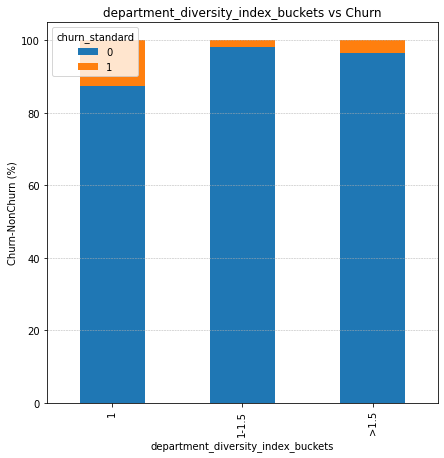

In [65]:
df_group = IIT_churn_master_dataset.groupby(['dept_diversity_index_buckets','churn_standard'])['Customer No'].count().reset_index()



df_group_pivot = df_group.pivot_table('Customer No', ['dept_diversity_index_buckets'], 'churn_standard')
stacked_data = df_group_pivot.apply(lambda x: x*100/sum(x), axis=1)

stacked_data.plot(kind="bar", stacked=True, figsize = (7, 7))
plt.title("department_diversity_index_buckets vs Churn")
plt.xlabel("department_diversity_index_buckets")
plt.ylabel("Churn-NonChurn (%)")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
plt.show()

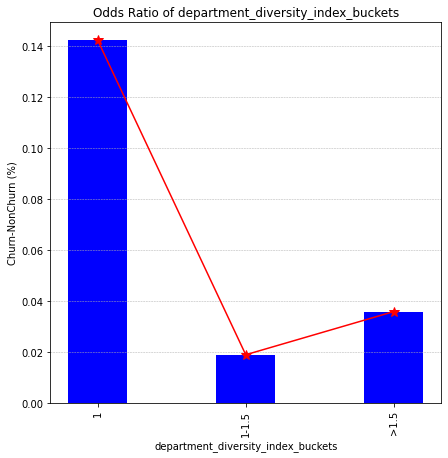

In [67]:
df_group_pivot['odds_ratio'] = df_group_pivot[1.0]/df_group_pivot[0.0]
df_group_pivot = df_group_pivot.reset_index()
fig = plt.figure(figsize = (7, 7))
plt.bar(df_group_pivot['dept_diversity_index_buckets'], df_group_pivot['odds_ratio'], color ='blue',
        width = 0.4)
df_group_pivot['odds_ratio'].plot(kind='line', marker='*', color='red', ms=10)

plt.title("Odds Ratio of department_diversity_index_buckets")
plt.xlabel("department_diversity_index_buckets")
plt.xticks(rotation=90)
plt.ylabel("Churn-NonChurn (%)")

plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)


Score: 6.5

In [69]:
IIT_churn_master_dataset_2 = IIT_churn_master_dataset.drop(['customer_time','Customer No','Posting Date','time_to_order',
                       'expected_purchase_window','time_to_churn_standard','time_to_churn_modified','churn_modified','churn_score','churn alarm',
                       'HQ_State__c','Tier__c','ZI_Technologies__c','total_platinum_items','total_gold_items',
                       'total_silver_items','total_Bronze_items','total_Metal_items','Platinum_bucket','Customer_specific_pop.Item','BDM_and_Inside_Coverage__c',
                       'ZI_Company_Revenue_Range__c','ZI_Industry__c','Family_Segmentation__c',
                        'item_diversity_buckets','time_between_sales_trend_buckets','Perc_DGOP_buckets',
                        'dept_diversity_index_buckets','ZI_Company_Ranking__c','ZI_Company_Employee_Range__c',
                         'Total_DGOP_Contacts'],axis = 1)

In [ ]:
 #IIT_churn_master_dataset_2 =  IIT_churn_master_dataset_2.drop(['Total_DGOP_Contacts'],axis = 1)

Imputing Missing Values

In [70]:
IIT_churn_master_dataset_2['ZI_Company_Type__c'].fillna('Unknown', inplace = True)
IIT_churn_master_dataset_2['ZI_Number_Of_Locations__c'].fillna(IIT_churn_master_dataset_2['ZI_Number_Of_Locations__c'].mode()[0], inplace = True)
IIT_churn_master_dataset_2['Gradient_Revenue'].fillna(0, inplace = True)
IIT_churn_master_dataset_2['time_between_sales_trend'].fillna(0, inplace = True)
IIT_churn_master_dataset_2['gradient_rev_direction'].fillna('Unknown', inplace = True)
IIT_churn_master_dataset_2['TotalContacts'].fillna(IIT_churn_master_dataset_2['TotalContacts'].mode()[0], inplace = True)

# Feature Selection

In [103]:
IIT_churn_master_dataset_2['Coverage_Priority__c'] = IIT_churn_master_dataset_2['Coverage_Priority__c'].astype('category')
IIT_churn_master_dataset_2['ZI_Company_Type__c'] = IIT_churn_master_dataset_2['ZI_Company_Type__c'].astype('category')
IIT_churn_master_dataset_2['Platinum_Quality_bucket'] = IIT_churn_master_dataset_2['Platinum_Quality_bucket'].astype('category')
IIT_churn_master_dataset_2['Family_Industry_Description_New__c'] = IIT_churn_master_dataset_2['Family_Industry_Description_New__c'].astype('category')
IIT_churn_master_dataset_2['Territory__c'] = IIT_churn_master_dataset_2['Territory__c'].astype('category')
IIT_churn_master_dataset_2['compliance_score'] = IIT_churn_master_dataset_2['compliance_score'].astype('category')


train = IIT_churn_master_dataset_2[['Coverage_Priority__c', 'ZI_Company_Type__c','count',
       'ZI_Number_Of_Locations__c', 'cumulative_sum_revenue',
       'Platinum_Gold_Quality_Ratio','tenure', 'AvgCost', 'AvgQuantity',
       'TotalQuantity', 'Popular_item_count', 'No.Of Managers',
       'Consolidated_Silverpop', 'TotalContacts', 'Perc_DGOP',
       'Family_Industry_Description_New__c', 'Territory__c',
       'compliance_score', 'Gradient_Revenue', 'time_between_sales_trend',
       'item_diversity_index', 'Client_revenue',
       'plat_gold_per_transaction']]

In [104]:
#Adding rename columns
train = train.rename(columns={"count":"No_of_Transactions","Gradient_Revenue":"Gradient_Cost","cumulative_sum_revenue":"cumulative_sum_amount","Perc_DGOP":"%_of_DG_OP_contacts"})

In [105]:
train.dtypes

Coverage_Priority__c                  category
ZI_Company_Type__c                    category
No_of_Transactions                       int64
ZI_Number_Of_Locations__c              float64
cumulative_sum_amount                  float64
Platinum_Gold_Quality_Ratio            float64
tenure                                   int64
AvgCost                                float64
AvgQuantity                            float64
TotalQuantity                            int64
Popular_item_count                     float64
No.Of Managers                         float64
Consolidated_Silverpop                 float64
TotalContacts                          float64
%_of_DG_OP_contacts                    float64
Family_Industry_Description_New__c    category
Territory__c                          category
compliance_score                      category
Gradient_Cost                          float64
time_between_sales_trend               float64
item_diversity_index                   float64
Client_revenu

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

train = train.apply(preprocessing.LabelEncoder().fit_transform)

ss = StandardScaler()
X_scaled = ss.fit_transform(train)

x = X_scaled

y = IIT_churn_master_dataset_2['churn_standard'].astype('category')



## Logistic Regression

In [107]:
model = LogisticRegression()
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

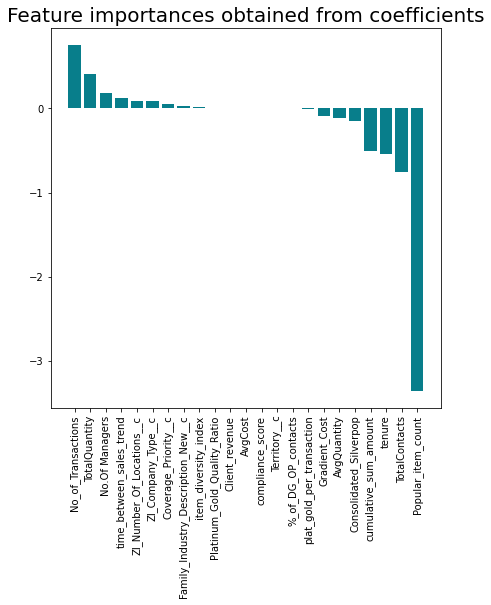

In [108]:
fig = plt.figure(figsize = (7, 7))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random Forest

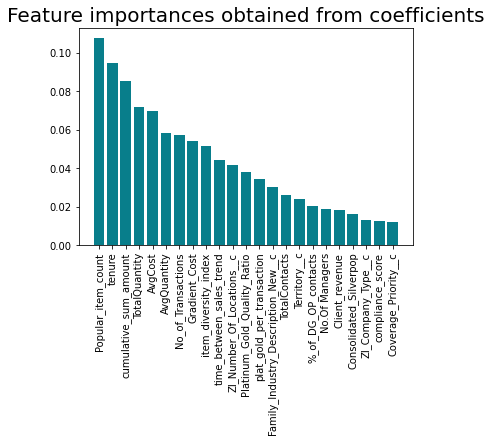

In [109]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_scaled, y)
# get importance
importances = pd.DataFrame(data={
    'Attribute': train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## XGBoost

In [110]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_scaled, y)
importances = pd.DataFrame(data={
    'Attribute': train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

g:\installed\pyenvironments\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
g:\installed\pyenvironments\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


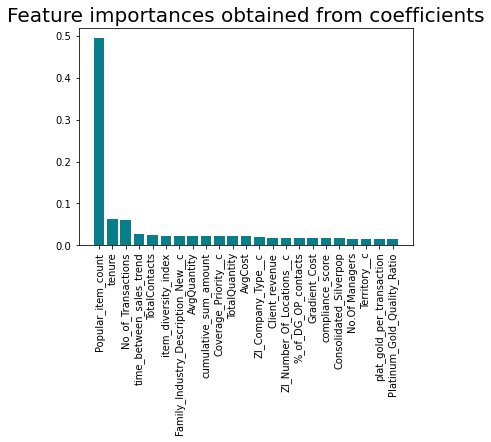

In [111]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Kbest

In [112]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X = x
Y = y
# feature extraction
test = SelectKBest(score_func=f_classif, k=7)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[  510.395  1527.923  3579.883    47.355 14549.314   389.355  6903.439
  4745.678  5296.11   3455.501  8114.916  2539.206  2947.133  3997.755
    29.944   456.136    59.627   152.736    53.686   397.754   970.72
   457.488   458.337]
[[-0.613 -1.564 -1.347 -1.378 -1.169 -0.906 -0.557]
 [-0.608 -1.538 -1.28  -1.512 -1.169 -0.906 -0.557]
 [-0.603 -1.419 -1.199 -1.299 -1.151 -0.906 -0.557]
 [-0.598 -1.366 -1.07  -1.293 -1.132 -0.906 -0.557]
 [-0.594 -1.354 -0.889 -1.384 -1.146 -0.906 -0.557]]


In [113]:
cols = test.get_support(indices=True)
features_df_new = train.iloc[:,cols]
features_df_new

,No_of_Transactions,cumulative_sum_amount,tenure,AvgCost,AvgQuantity,Popular_item_count,TotalContacts
2,0,4202,0,18224,548,3,5
3,1,5759,42,10247,548,3,5
4,2,12733,93,22929,1137,3,5
5,3,15850,174,23233,1791,3,5
6,4,16539,288,17868,1330,3,5
...,...,...,...,...,...,...,...
418269,1,4830,2,7190,1566,1,1
418270,0,10165,0,79105,288,0,1
418271,1,21580,7,110630,227,0,1
418272,0,1962,0,5778,288,1,1


## RFE

In [114]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# load data
X = x
Y = y
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select = 7)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 7
Selected Features: [False False  True False  True False  True False False  True  True  True
 False  True False False False False False False False False False]
Feature Ranking: [ 8  7  1  6  1 12  1 14  4  1  1  1  2  1 16  9 17 15  5  3 10 13 11]


In [115]:
import numpy as np
feature_names = np.array(train.columns) # transformed list to array
feature_names[fit.support_]

array(['No_of_Transactions', 'cumulative_sum_amount', 'tenure',
       'TotalQuantity', 'Popular_item_count', 'No.Of Managers',
       'TotalContacts'], dtype=object)